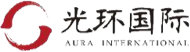

### 级联操作
- pd.concat

In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame

pandas使用pd.concat函数，与np.concatenate函数类似，只是多了一些参数：
```
objs
axis=0
keys
join='outer' / 'inner':表示的是级联的方式，outer会将所有的项进行级联（忽略匹配和不匹配），而inner只会将匹配的项级联到一起，不匹配的不级联
ignore_index=False
```

- 匹配级联

In [3]:
df1 = pd.DataFrame(data=np.random.randint(0,100,size=(4,3)),columns=['A','B','C'])
df2 = pd.DataFrame(data=np.random.randint(0,100,size=(4,4)),columns=['A','B','C','D'])

In [4]:
df1

,A,B,C
0,94,75,90
1,73,14,47
2,96,46,71
3,13,78,88


In [5]:
df2

,A,B,C,D
0,3,0,2,61
1,7,7,86,4
2,24,94,96,63
3,45,31,32,90


In [6]:
pd.concat((df1,df1),axis=0)

,A,B,C
0,94,75,90
1,73,14,47
2,96,46,71
3,13,78,88
0,94,75,90
1,73,14,47
2,96,46,71
3,13,78,88


In [7]:
#将级联后的行索引顺序指定
pd.concat((df1,df1),axis=0,ignore_index=True)

,A,B,C
0,94,75,90
1,73,14,47
2,96,46,71
3,13,78,88
4,94,75,90
5,73,14,47
6,96,46,71
7,13,78,88


- 不匹配级联
    - 不匹配指的是级联的维度的索引不一致。例如纵向级联时列索引不一致，横向级联时行索引不一致
    - 有2种连接方式：
        - 外连接outer：补NaN（默认模式）
        - 内连接inner：只连接匹配的项

In [8]:
pd.concat((df1,df2),axis=0)

,A,B,C,D
0,94,75,90,NaN
1,73,14,47,NaN
2,96,46,71,NaN
3,13,78,88,NaN
0,3,0,2,61.0
1,7,7,86,4.0
2,24,94,96,63.0
3,45,31,32,90.0


In [9]:
pd.concat((df1,df2),axis=0,join='outer')

,A,B,C,D
0,94,75,90,NaN
1,73,14,47,NaN
2,96,46,71,NaN
3,13,78,88,NaN
0,3,0,2,61.0
1,7,7,86,4.0
2,24,94,96,63.0
3,45,31,32,90.0


In [10]:
pd.concat((df1,df2),axis=0,join='inner')

,A,B,C
0,94,75,90
1,73,14,47
2,96,46,71
3,13,78,88
0,3,0,2
1,7,7,86
2,24,94,96
3,45,31,32


### 合并操作
- merge与concat的区别在于，merge需要依据某一共同列来进行合并

- 使用pd.merge()合并时，会自动根据两者相同column名称的那一列，作为key来进行合并。

- 注意每一列元素的顺序不要求一致

#### 一对一合并

In [11]:
from pandas import DataFrame

In [12]:
df1 = DataFrame({'employee':['Bob','Jake','Lisa'],
                'group':['Accounting','Engineering','Engineering'],
                })
df1

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering


In [13]:
df2 = DataFrame({'employee':['Lisa','Bob','Jake'],
                'hire_date':[2004,2008,2012],
                })
df2

,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012


In [14]:
pd.merge(left=df1,right=df2,on='employee')

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004


#### 一对多合并

In [15]:
df3 = DataFrame({
    'employee':['Lisa','Jake'],
    'group':['Accounting','Engineering'],
    'hire_date':[2004,2016]})
df3

,employee,group,hire_date
0,Lisa,Accounting,2004
1,Jake,Engineering,2016


In [16]:
df4 = DataFrame({'group':['Accounting','Engineering','Engineering'],
                       'supervisor':['Carly','Guido','Steve']
                })
df4

,group,supervisor
0,Accounting,Carly
1,Engineering,Guido
2,Engineering,Steve


In [17]:
pd.merge(left=df3,right=df4,on='group')

,employee,group,hire_date,supervisor
0,Lisa,Accounting,2004,Carly
1,Jake,Engineering,2016,Guido
2,Jake,Engineering,2016,Steve


#### 多对多合并

In [18]:
df1 = DataFrame({'employee':['Bob','Jake','Lisa'],
                 'group':['Accounting','Engineering','Engineering']})
df1

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering


In [19]:
df2 = DataFrame({'group':['Engineering','Engineering','HR'],
                'supervisor':['Carly','Guido','Steve']
                })
df2

,group,supervisor
0,Engineering,Carly
1,Engineering,Guido
2,HR,Steve


In [20]:
pd.merge(left=df1,right=df2,on='group')

,employee,group,supervisor
0,Jake,Engineering,Carly
1,Jake,Engineering,Guido
2,Lisa,Engineering,Carly
3,Lisa,Engineering,Guido


In [21]:
pd.merge(left=df1,right=df2,on='group',how='outer')

,employee,group,supervisor
0,Bob,Accounting,NaN
1,Jake,Engineering,Carly
2,Jake,Engineering,Guido
3,Lisa,Engineering,Carly
4,Lisa,Engineering,Guido
5,NaN,HR,Steve


In [22]:
pd.merge(left=df1,right=df2,on='group',how='left')

,employee,group,supervisor
0,Bob,Accounting,NaN
1,Jake,Engineering,Carly
2,Jake,Engineering,Guido
3,Lisa,Engineering,Carly
4,Lisa,Engineering,Guido


#### key的规范化


- 当两张表没有可进行连接的列时，可使用left_on和right_on手动指定merge中左右两边的哪一列列作为连接的列

In [23]:
df1 = DataFrame({'employee':['Bobs','Linda','Bill'],
                'group':['Accounting','Product','Marketing'],
               'hire_date':[1998,2017,2018]})
df1

,employee,group,hire_date
0,Bobs,Accounting,1998
1,Linda,Product,2017
2,Bill,Marketing,2018


In [24]:
df2 = DataFrame({'name':['Lisa','Bobs','Bill'],
                'hire_dates':[1998,2016,2007]})
df2

,name,hire_dates
0,Lisa,1998
1,Bobs,2016
2,Bill,2007


In [25]:
pd.merge(left=df1,right=df2,left_on='employee',right_on='name')

,employee,group,hire_date,name,hire_dates
0,Bobs,Accounting,1998,Bobs,2016
1,Bill,Marketing,2018,Bill,2007
